We start loading functions which will be useful

In [26]:
load("https://raw.githubusercontent.com/enriqueartal/Miscellanous-SageFunctions/master/MonodromyGroupFunctions.sage")

We are dealing with three fibers $X_2,X_3,X_5$ and three sections $Y_2,Y_3,Y_5$ of $\mathbb{P}^1\times\mathbb{P}^1$, the corresponding ones intersecting at the diagonal $D$. We put the fiber $X_2$ and the section $Y_2$ at $\infty$.

The base of the fundamental group is the intersection point of the dashed vertical and horizontal lines. We pick three generators for the fundamental group of the fiber:

- $\alpha_1$ meridian of $Y_3$.
- $\alpha_2$ meridian of $D$.
- $\alpha_3$ meridian of $Y_5$.

They form a geometric basis such that $(\alpha_3\cdot\alpha_2\cdot\alpha_1)^{-1}$ is a meridian of $Y_2$. The braid monodromy can be deduced from the below real picture:

- For $X_5$: $\sigma_2^2$.
- For $X_3$: $\sigma_1^2$.

We denote by $\alpha_4$, $\alpha_5$ the meridians of $X_5$ and $X_3$, respectively, in the horizontal line. A meridian of $D$ in this horizontal line is naturally 
$\alpha_1^{(\sigma_1^{-1})}=\alpha_1^{-1}\cdot\alpha_2\cdot\alpha_1$. 
As a consequence $(\alpha_1^{-1}\cdot\alpha_2\cdot\alpha_1\cdot\alpha_5\cdot\alpha_4)^{-1}$ is a meridian of $X_2$. Interpretation of braid monodromy is as follows. For $i=1,2,3$:

- $\alpha_4^{-1}\cdot\alpha_i\cdot\alpha_4=\alpha_i^{(\sigma_2)^2}$.
- $\alpha_5^{-1}\cdot\alpha_i\cdot\alpha_5=\alpha_i^{(\sigma_1)^2}$.

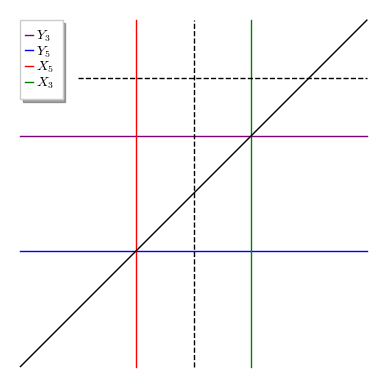

In [27]:
var('t')
Y5=parametric_plot((t,0),(t,-1,2),axes=False,legend_label=r'$Y_5$')
X5=parametric_plot((0,t),(t,-1,2),axes=False,color='red',legend_label=r'$X_5$')
Y3=parametric_plot((t,1),(t,-1,2),axes=False,color='purple',legend_label=r'$Y_3$')
X3=parametric_plot((1,t),(t,-1,2),axes=False,color='green',legend_label=r'$X_3$')
D=parametric_plot((t,t),(t,-1,2),axes=False,color='black')
V=parametric_plot((.5,t),(t,-1,2),axes=False,color='black',linestyle="dashed")
H=parametric_plot((t,1.5),(t,-.5,2),axes=False,color='black',linestyle="dashed")
Y3+Y5+X5+X3+D+V+H

We consider the free groups $\mathbb{F}_3\subset\mathbb{F}_5$ and the braid group $\mathbb{B}_3$ which acts on the right on $\mathbb{F}_3$ as follows:

$$
\alpha_i^{\sigma_j}=
\begin{cases}
\alpha_i&\text{ if }i\neq j,j-1,\\
\alpha_{i+1}&\text{ if }i=j,\\
\alpha_{i}\cdot\alpha_{i-1}\cdot\alpha_{i}^{-1}&\text{ if }i=j-1.
\end{cases}
$$
With all these data we construct the presentation of the group.

In [28]:
F3=FreeGroup(3)
F5=FreeGroup(5)
B5=BraidGroup(3)

Let us define the list of the braids.

In [29]:
T=[B5(2*[i]) for i in [2,1]]
T

[s1^2, s0^2]

We construct the list of relations using the function `LibreTrenza` which expresses the above action.

In [30]:
L=[]
for j in [0,1]:
    u=F5.gen(3+j)
    t=T[j]
    for i in [1..3]:
        a0=LibreTrenza(F3([i]),t).Tietze()
        L.append(u^-1*F5([i])*u/F5(a0))
L

[x3^-1*x0*x3*x0^-1,
 x3^-1*x1*x3*x2*x1^-1*x2^-1,
 x3^-1*x2*x3*x2*x1*x2^-1*x1^-1*x2^-1,
 x4^-1*x0*x4*x1*x0^-1*x1^-1,
 x4^-1*x1*x4*x1*x0*x1^-1*x0^-1*x1^-1,
 x4^-1*x2*x4*x2^-1]

We include the orbifold relations.

In [31]:
L+=[F5(3*[1]),F5(3*[5]),F5(5*[3]),F5(5*[4]),F5(2*[3,2,1]),F5(2*[-1,2,1,5,4])]

Let us construct the group $G$ and the alternating group $A_5$. We see the two possible epimorphisms coming from the projections.

In [32]:
G=F5/L
#A5=FreeGroup(2)/[3*[1],5*[2],2*[1,2]]
A5=AlternatingGroup(5)

In [33]:
G.epimorphisms(A5)

[Generic morphism:
   From: Finitely presented group < x0, x1, x2, x3, x4 | x3^-1*x0*x3*x0^-1, x3^-1*x1*x3*x2*x1^-1*x2^-1, x3^-1*x2*x3*x2*x1*x2^-1*x1^-1*x2^-1, x4^-1*x0*x4*x1*x0^-1*x1^-1, x4^-1*x1*x4*x1*x0*x1^-1*x0^-1*x1^-1, x4^-1*x2*x4*x2^-1, x0^3, x4^3, x2^5, x3^5, (x2*x1*x0)^2, (x0^-1*x1*x0*x4*x3)^2 >
   To:   Alternating group of order 5!/2 as a permutation group
   Defn: x0 |--> ()
         x1 |--> ()
         x2 |--> ()
         x3 |--> (1,3,4,2,5)
         x4 |--> (1,2,3), Generic morphism:
   From: Finitely presented group < x0, x1, x2, x3, x4 | x3^-1*x0*x3*x0^-1, x3^-1*x1*x3*x2*x1^-1*x2^-1, x3^-1*x2*x3*x2*x1*x2^-1*x1^-1*x2^-1, x4^-1*x0*x4*x1*x0^-1*x1^-1, x4^-1*x1*x4*x1*x0*x1^-1*x0^-1*x1^-1, x4^-1*x2*x4*x2^-1, x0^3, x4^3, x2^5, x3^5, (x2*x1*x0)^2, (x0^-1*x1*x0*x4*x3)^2 >
   To:   Alternating group of order 5!/2 as a permutation group
   Defn: x0 |--> (2,5,3)
         x1 |--> ()
         x2 |--> (1,2,3,4,5)
         x3 |--> ()
         x4 |--> ()]

To compute the intersection of the kernels we give a presentation of the direct product $A_5^2$: 
$$
\langle x,y,z,t\mid x^3=y^5=(x\cdot y)^2=z^3=t^5=(z\cdot t)^2=1,
[x,z]=[x,t]=[y,z]=[y,t]=1
\rangle
$$

In [34]:
B5=FreeGroup(4)/[3*[1],3*[3],5*[2],5*[4],2*[1,2],2*[3,4],[1,3,-1,-3],[1,4,-1,-4],[2,3,-2,-3],[2,4,-2,-4]]

We construct the epimorphism on the direct product; we use `GAP` to construct its kernel and compute its Abelian invariants.

In [35]:
hom=HomomorphismGroups(G,B5,[B5([1]),B5.one(),B5([2]),B5([4]),B5([3])])

In [37]:
K=hom.Kernel()

In [38]:
K.AbelianInvariants()

[ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]

In [39]:
len(K.AbelianInvariants())

59

As a consequence the abelianization of this kernel is $\mathbb{Z}^{59}$ and the group is infinite.